In [1]:
%pip install shap
!pip install kmodes
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import shap
from kmodes.kmodes import KModes
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

Note: you may need to restart the kernel to use updated packages.


In [2]:
Individuos = pd.read_csv(r'C:/Users/jlope/Documents/Maestría en Ingeniería - Analítica/Tesis/Modelos/BDIndividuosTotal.csv',decimal=',')
Individuos

,S_1,I_6,I_7,I_8,I_9,I_10,I_19,I_21_1,I_21_2,I_21_3,...,I_91_10,I_30,I_41,I_44,I_45,I_47,Condiciones Territoriales,Prácticas,Efectos,IPCM
0,1,Femenino,1985,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,...,No,Si,No,Si,Si,Mejorado,0.361794798490289,0.387014340398247,0.44463337516526,0.4
1,1,Masculino,1953,Sin pertenencia étnica,Ninguno,Básica Primaria,No,No,Si,No,...,Si,Si,Si,Si,No,Mejorado,0.327151236848329,0.461778890169669,0.238168161836116,0.33
2,1,Femenino,1970,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Ninguno,No,No,No,No,...,No,Si,No,No,No,Empeorado,0.299800315453029,0.372016686965189,0.673631667238401,0.42
3,1,Femenino,1989,Sin pertenencia étnica,Desplazados o víctima del Conflicto Armado,Básica Secundaria,Si,No,No,No,...,No,Si,No,Si,No,Mejorado,0.558784023179863,0.633541759101517,0.323002606500402,0.49
4,1,Femenino,1953,Mestizo,Ninguno,Ninguno,Si,No,No,No,...,No,No,No,Si,No,Permanecen iguales,0.250182909249344,0.521447482222032,0.238168161836116,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11356,12,Hombre,1999,No se identifica con ninguno de los anteriores,Ninguna,Básica secundaria,No,No,No,No,...,No,Si,No,No,No,Permanecen iguales,0.21317564171051,0.439428896142171,0.30527580531839,0.305801439570261
11357,12,Hombre,1994,Mestizo,Ninguna,Básica secundaria,No,No,No,No,...,No,No,No,No,No,Permanecen iguales,0.194827985413158,0.879479847931544,0.315275008033687,0.378026512143469
11358,12,Hombre,1968,No se identifica con ninguno de los anteriores,Ninguna,Básica secundaria,No,No,No,No,...,No,Si,No,Si,No,Permanecen iguales,0.532416558719664,0.481449785781779,0.311142120812354,0.430447761005128
11359,12,Hombre,1998,No se identifica con ninguno de los anteriores,Ninguna,Básica secundaria,No,No,No,No,...,No,No,No,No,No,Mejorado,0.548475866469842,0.593568976891309,0.354381149153931,0.486817792953296


In [3]:
Individuos = Individuos[[#'S_1', 'I_6', 'I_7', 'I_8', 'I_9', 'I_10',
          "I_19",	"I_21_1",	"I_21_2",	"I_21_3", "I_22",	"I_23",	"I_24",	"I_26_1",	"I_26_2","I_26_3", "I_27",	"I_28_1", "I_29",
          "I_32",	"I_33",	"I_40_1", "I_40_2", "I_40_3", "I_40_4", "I_40_5",	"I_90_1", "I_90_2","I_90_3","I_90_4","I_90_5","I_90_6","I_90_7",
          "I_90_8","I_90_9","I_90_10",
          "I_31",	"I_35_1", "I_38",	"I_51_2", "I_51_3",	"I_51_4",	"I_52",	"I_54", "I_55",	"I_48_1", "I_48_2", "I_48_3", "I_48_4", "I_48_5",
          "I_48_6","I_48_7","I_48_8","I_48_9", "I_91_1","I_91_2","I_91_3","I_91_4","I_91_5","I_91_6","I_91_7","I_91_8","I_91_9","I_91_10",
          "I_30",	"I_41",	"I_44",	"I_45","I_47",
          'IPCM']]
Individuos = Individuos.dropna()
# Individuos.to_excel('IndividuosIPCM.xlsx', index=False)
Individuos

,I_19,I_21_1,I_21_2,I_21_3,I_22,I_23,I_24,I_26_1,I_26_2,I_26_3,...,I_91_7,I_91_8,I_91_9,I_91_10,I_30,I_41,I_44,I_45,I_47,IPCM
0,Si,No,No,No,No,No,Adecuadas,No,Si,No,...,No,No,No,No,Si,No,Si,Si,Mejorado,0.4
1,No,No,Si,No,Si,Si,Regulares,Si,Si,No,...,Si,No,No,Si,Si,Si,Si,No,Mejorado,0.33
2,No,No,No,No,No,No,Inadecuadas,Si,No,No,...,No,Si,No,No,Si,No,No,No,Empeorado,0.42
3,Si,No,No,No,No,No,Regulares,No,No,No,...,No,Si,No,No,Si,No,Si,No,Mejorado,0.49
4,Si,No,No,No,No,No,Adecuadas,No,No,No,...,No,Si,No,No,No,No,Si,No,Permanecen iguales,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11356,No,No,No,No,No,No,Sin registro,No,No,No,...,No,No,No,No,Si,No,No,No,Permanecen iguales,0.305801439570261
11357,No,No,No,No,No,No,Sin registro,No,No,No,...,No,No,No,No,No,No,No,No,Permanecen iguales,0.378026512143469
11358,No,No,No,No,No,No,Sin registro,No,No,No,...,No,No,No,No,Si,No,Si,No,Permanecen iguales,0.430447761005128
11359,No,No,No,No,No,No,Sin registro,No,No,No,...,No,No,No,No,No,No,No,No,Mejorado,0.486817792953296


In [6]:
Ind = np.array(Individuos.drop(['IPCM'],1))
feature_names = Individuos.drop(['IPCM'],1)
feature_names = feature_names.columns
feature_names = np.array(feature_names)
ordinalEncoder = OrdinalEncoder(categories="auto", dtype=np.float64)
ordinalEncoder.fit(Ind)
Ind = ordinalEncoder.transform(Ind)
Ind = pd.DataFrame(Ind, columns=feature_names)
Ind['IPCM'] = Individuos['IPCM'].astype(float)
Ind['IPCM'] = Ind['IPCM'].replace(np.nan, 0.0, regex=True)
# X['IPCM'].isnull().sum()

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [7]:
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(Ind.iloc[:,1:])
Ind["Clase"] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4093, cost: 248372.0
Run 1, iteration: 2/100, moves: 713, cost: 248372.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4055, cost: 248745.0
Run 2, iteration: 2/100, moves: 2613, cost: 244105.0
Run 2, iteration: 3/100, moves: 1275, cost: 243408.0
Run 2, iteration: 4/100, moves: 40, cost: 243408.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3023, cost: 245335.0
Run 3, iteration: 2/100, moves: 970, cost: 245335.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4138, cost: 245003.0
Run 4, iteration: 2/100, moves: 1641, cost: 244479.0
Run 4, iteration: 3/100, moves: 29, cost: 244479.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


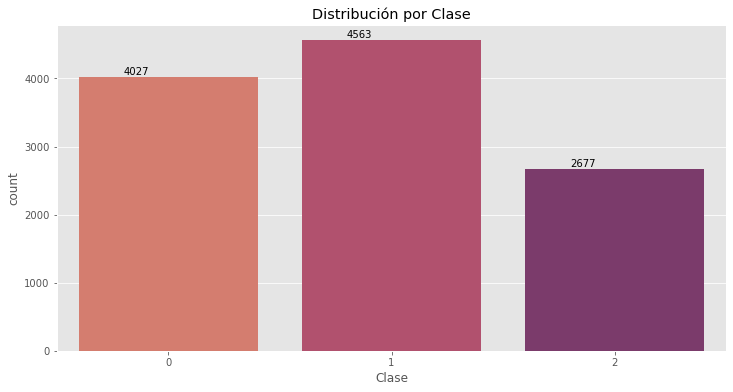

In [8]:
plt.style.use('ggplot')
Frecuencia = Ind.groupby('Clase').sum()
plt.figure(figsize=(12,6))
graf = sns.countplot(Ind['Clase'],palette='flare')
plt.title('Distribución por Clase')
for p in graf.patches:
    graf.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='bottom', color='black', size=10)
plt.show()

In [9]:
X = np.array(Ind.drop(['Clase','IPCM'],1))
Y = np.array(Ind['Clase'])
feature_names = Ind.drop(['Clase','IPCM'],1)
feature_names = feature_names.columns
feature_names = np.array(feature_names)
feature_names
# X = Individuos.drop(['Clase','IPCM'],1)
# Y = Individuos['Clase']

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


array(['I_19', 'I_21_1', 'I_21_2', 'I_21_3', 'I_22', 'I_23', 'I_24',
       'I_26_1', 'I_26_2', 'I_26_3', 'I_27', 'I_28_1', 'I_29', 'I_32',
       'I_33', 'I_40_1', 'I_40_2', 'I_40_3', 'I_40_4', 'I_40_5', 'I_90_1',
       'I_90_2', 'I_90_3', 'I_90_4', 'I_90_5', 'I_90_6', 'I_90_7',
       'I_90_8', 'I_90_9', 'I_90_10', 'I_31', 'I_35_1', 'I_38', 'I_51_2',
       'I_51_3', 'I_51_4', 'I_52', 'I_54', 'I_55', 'I_48_1', 'I_48_2',
       'I_48_3', 'I_48_4', 'I_48_5', 'I_48_6', 'I_48_7', 'I_48_8',
       'I_48_9', 'I_91_1', 'I_91_2', 'I_91_3', 'I_91_4', 'I_91_5',
       'I_91_6', 'I_91_7', 'I_91_8', 'I_91_9', 'I_91_10', 'I_30', 'I_41',
       'I_44', 'I_45', 'I_47'], dtype=object)

In [10]:
X = pd.DataFrame(X, columns=feature_names)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1234)

In [12]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

In [13]:
rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs_rfc = GridSearchCV(rfc, param_grid, cv=skf, verbose=1, n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [14]:
print("Mejores parámetros", gs_rfc.best_params_)
print("Mejor estimador", gs_rfc.best_estimator_)

Mejores parámetros {'max_features': 'sqrt', 'n_estimators': 500}
Mejor estimador RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=500)


In [15]:
rfc = RandomForestClassifier(max_features= 'sqrt', n_estimators= 500, class_weight='balanced')

rfc.fit(X_train,y_train)
rfc_y_pred = rfc.predict(X_test)
rfc_y_pred

array([1, 2, 2, ..., 0, 1, 2], dtype=uint16)

In [16]:
matriz_rfc = confusion_matrix(y_test, rfc_y_pred)
print('Matriz de Confusión:')
print(matriz_rfc)

Matriz de Confusión:
[[1037   46   70]
 [  48 1350    9]
 [ 110   56  655]]


Text(0.5, 15.0, 'Predicción')

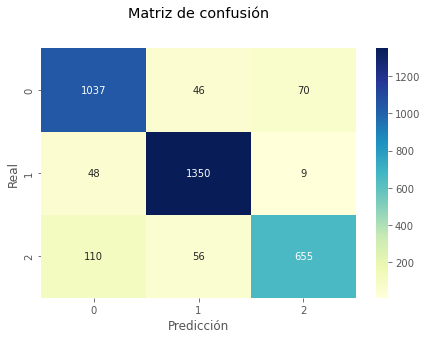

In [17]:
sns.heatmap(pd.DataFrame(matriz_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [18]:
precision_rfc = precision_score(y_test, rfc_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_rfc)

accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
print('Exactitud del modelo:')
print(accuracy_rfc)

Precisión del modelo:
0.8997338065661047
Exactitud del modelo:
0.8997338065661047


In [19]:
clas_rfc = classification_report(y_test, rfc_y_pred, zero_division = 1)
print(clas_rfc)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1153
           1       0.93      0.96      0.94      1407
           2       0.89      0.80      0.84       821

    accuracy                           0.90      3381
   macro avg       0.90      0.89      0.89      3381
weighted avg       0.90      0.90      0.90      3381



In [20]:
rfc.feature_importances_

array([0.00708082, 0.00373357, 0.01429741, 0.00383548, 0.0128731 ,
       0.02034671, 0.01130309, 0.00614949, 0.00894411, 0.00542686,
       0.00364366, 0.00202552, 0.0036599 , 0.00808477, 0.008594  ,
       0.01125462, 0.0163883 , 0.00994023, 0.00953689, 0.01329057,
       0.05007585, 0.03041282, 0.03413846, 0.03621123, 0.02628519,
       0.04347589, 0.03273833, 0.02409442, 0.04913061, 0.04905978,
       0.00612477, 0.00649223, 0.00334361, 0.01616359, 0.01672305,
       0.0140802 , 0.03520189, 0.02297035, 0.01913131, 0.01308696,
       0.01738352, 0.01749802, 0.02076547, 0.01953327, 0.02201983,
       0.02906219, 0.02315186, 0.03351052, 0.00263415, 0.00198978,
       0.00364363, 0.0044208 , 0.00385526, 0.00466278, 0.0030813 ,
       0.00311841, 0.00319455, 0.00274312, 0.00571415, 0.03717641,
       0.00932296, 0.01092665, 0.01124174])

Text(0.5, 0, 'Random Forest Feature Importance')

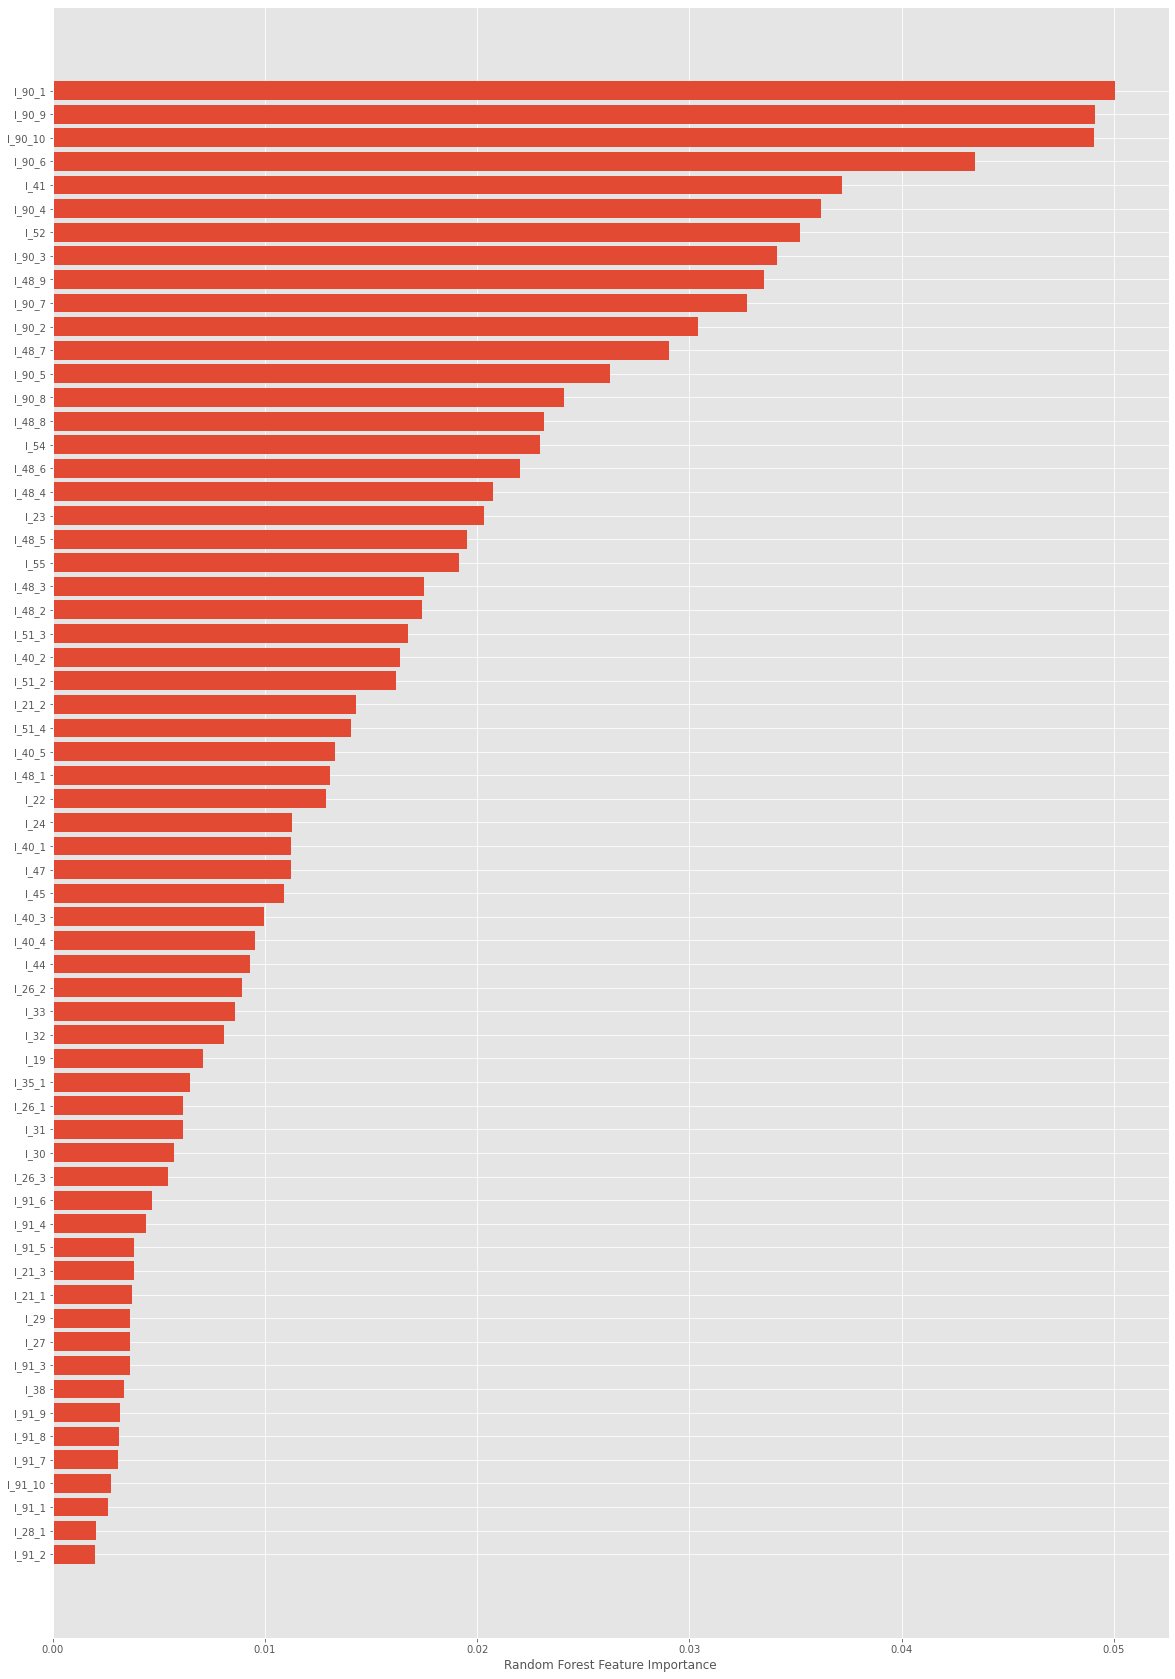

In [21]:
plt.rcParams["figure.figsize"] = (20, 30)
variables_importantes = rfc.feature_importances_.argsort()
plt.barh(feature_names[variables_importantes], rfc.feature_importances_[variables_importantes])
plt.xlabel("Random Forest Feature Importance")

In [22]:
perm_importance = permutation_importance(rfc, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

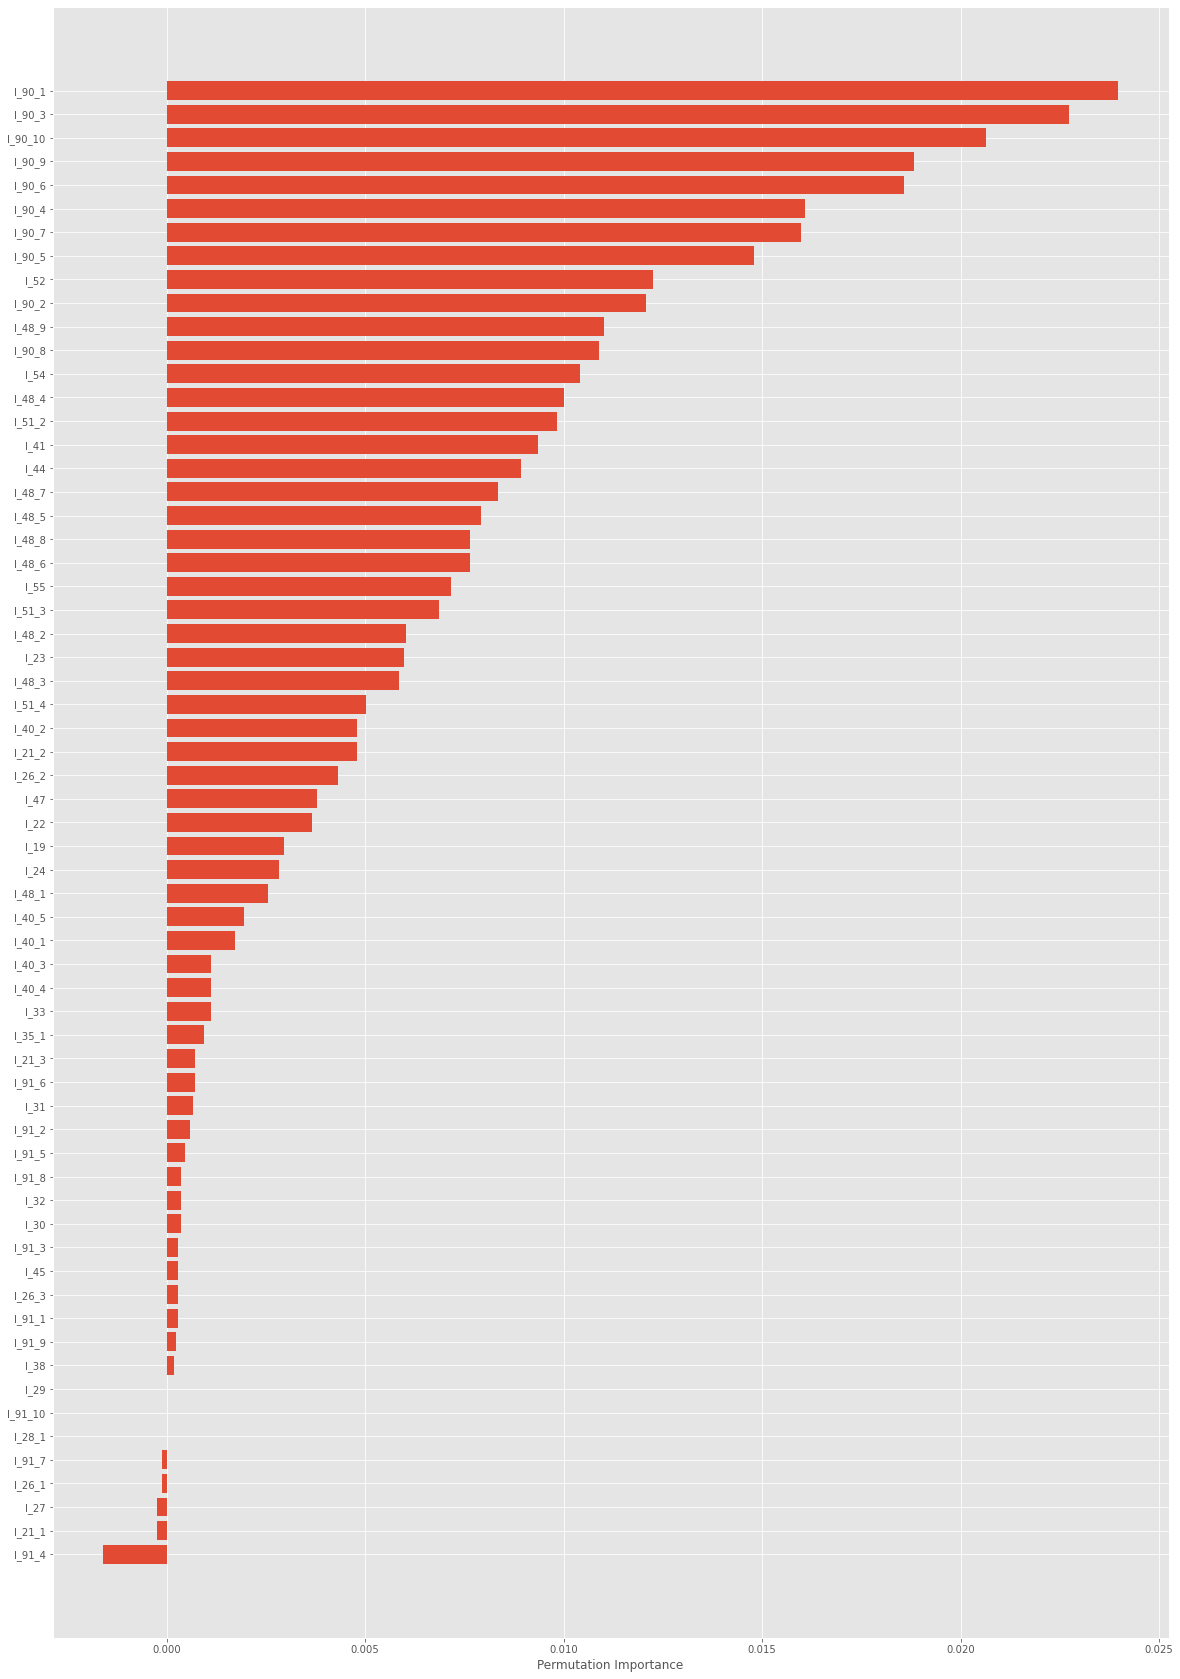

In [23]:
Variables_permutadas = perm_importance.importances_mean.argsort()
plt.barh(feature_names[Variables_permutadas], perm_importance.importances_mean[Variables_permutadas])
plt.xlabel("Permutation Importance")

In [24]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

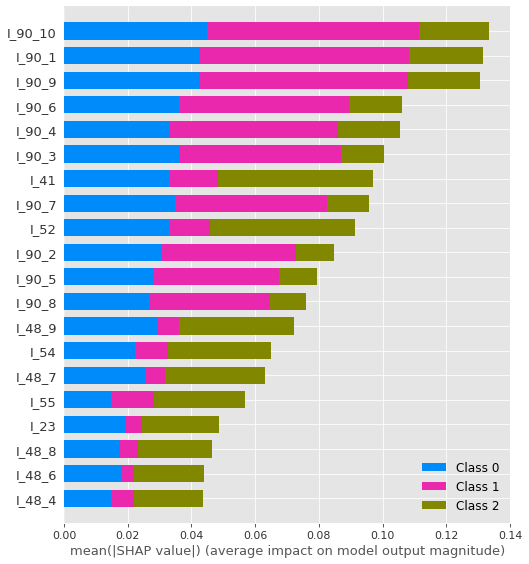

In [25]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

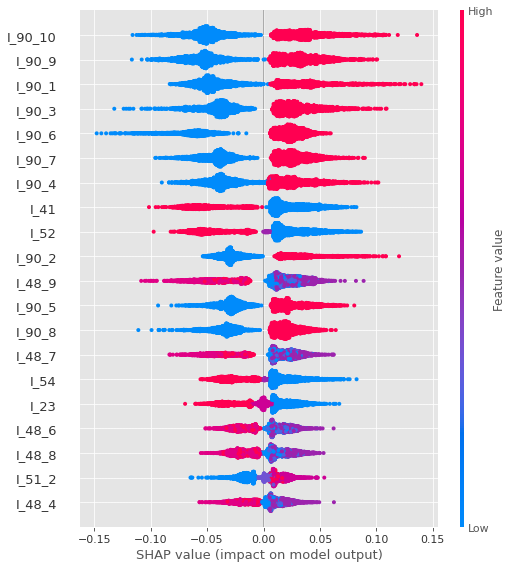

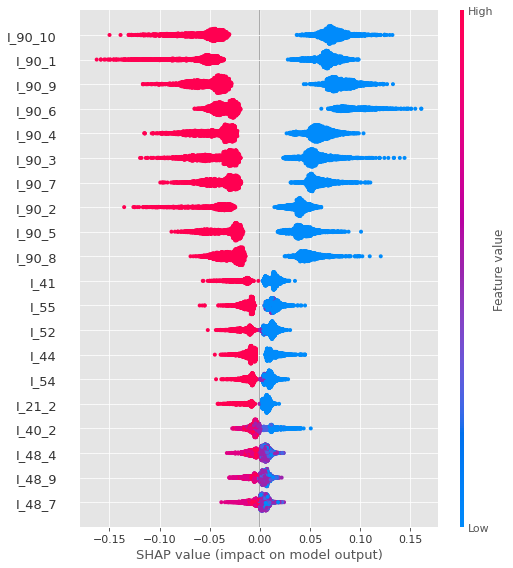

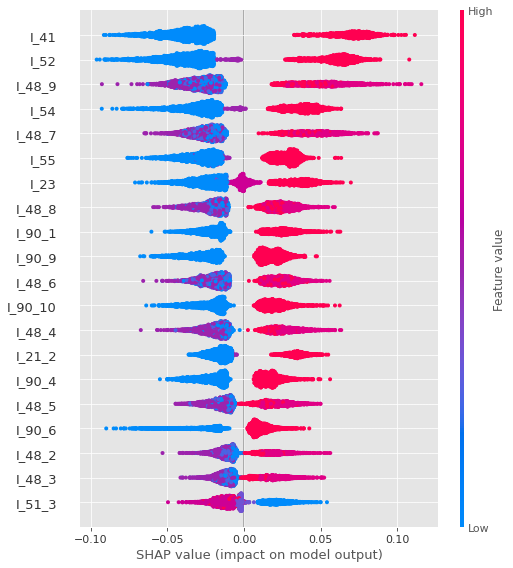

In [26]:
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[1], X_test)
shap.summary_plot(shap_values[2], X_test)

In [29]:
Organizaciones = pd.read_csv(r'C:/Users/jlope/Documents/Maestría en Ingeniería - Analítica/Tesis/Modelos/BDOrganizacionesTotal.csv',decimal=',')
Organizaciones = Organizaciones[["O_88","O_89",
                 "O_12","O_13","O_22","O_67","O_68","O_8","O_19_1","O_19_2","O_19_3","O_19_4","O_19_5","O_19_6","O_19_7","O_19_8","O_19_9", 
                 "O_20_1","O_20_2","O_20_3","O_20_4","O_20_5","O_20_6","O_20_7","O_20_8","O_70","O_71","O_72_1","O_72_2","O_72_3","O_72_4","O_72_5","O_72_6","O_72_7","O_72_8","O_72_9",
                 "O_24","O_48","O_52","O_54","O_58","O_59","O_90","O_28_1","O_28_2","O_28_3","O_28_4","O_28_5","O_28_6","O_28_7","O_28_8",
                 "O_37_1","O_37_2","O_37_3","O_37_4","O_37_5","O_38_1","O_38_2","O_38_3","O_38_4","O_38_5","O_38_6","O_38_7","O_38_8","O_38_9",
                 "O_66_1","O_66_2","O_66_3","O_66_4","O_66_5","O_66_6","O_66_7","O_81_1","O_81_2","O_81_3","O_81_4","O_81_5","O_81_6","O_81_7",
                 "O_82_1","O_82_2","O_82_3","O_82_4","O_82_5","O_82_6","O_82_7",
                 "O_40","O_41","O_45","O_49","O_55","O_61_1","O_61_2","O_61_3","O_61_4","O_61_5","O_62_1","O_62_2","O_62_3","O_62_4","O_62_5","O_62_6",
          'IPCM']]
Organizaciones

,O_88,O_89,O_12,O_13,O_22,O_67,O_68,O_8,O_19_1,O_19_2,...,O_61_3,O_61_4,O_61_5,O_62_1,O_62_2,O_62_3,O_62_4,O_62_5,O_62_6,IPCM
0,Hombre,Si,Si,No,300,No consulta,No consulta,No,No,No,...,Equitativo,Equitativo,Equitativo,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,0.79
1,Mujer,No,Si,Si,50,No consulta,No consulta,Si,No,No,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,0.75
2,Hombre,No,Si,Si,3000,Algunas veces,Casi siempre,Si,No,No,...,Totalmente inequitativo,Totalmente inequitativo,Totalmente inequitativo,Totalmente equitativo,Totalmente equitativo,Totalmente equitativo,Totalmente equitativo,Totalmente equitativo,Totalmente equitativo,0.36
3,Mujer,No,Si,Si,30,No consulta,No consulta,Si,No,No,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,0.65
4,Mujer,Si,Si,Si,12,Algunas veces,Algunas veces,Si,No,No,...,Inequitativo,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,Hombre,Si,No,No,50,No consulta,No consulta,No,No,No,...,Neutral,Neutral,Neutral,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,Sin registro,0.683986337645585
2835,Hombre,No,No,No,49,No consulta,No consulta,No,No,No,...,Inequitativo,Inequitativo,Equitativo,Neutral,Sin registro,Neutral,Neutral,Neutral,Equitativo,0.704817756271034
2836,Hombre,Si,No,No,15,No consulta,No consulta,No,No,No,...,Equitativo,Equitativo,Equitativo,Neutral,Sin registro,Neutral,Neutral,Equitativo,Neutral,0.696198909509832
2837,Mujer,Si,No,No,10,No consulta,No consulta,No,No,No,...,Inequitativo,Inequitativo,Inequitativo,Neutral,Sin registro,Neutral,Equitativo,Equitativo,Equitativo,0.693507266684298


In [30]:
Org = np.array(Organizaciones.drop(['IPCM'],1))
feature_names = Organizaciones.drop(['IPCM'],1)
feature_names = feature_names.columns
feature_names = np.array(feature_names)
ordinalEncoder = OrdinalEncoder(categories="auto", dtype=np.float64)
ordinalEncoder.fit(Org)
Org = ordinalEncoder.transform(Org)
Org = pd.DataFrame(Org, columns=feature_names)
Org['IPCM'] = Organizaciones['IPCM'].astype(float)
Org['IPCM'] = Org['IPCM'].replace(np.nan, 0.0, regex=True)
# X['IPCM'].isnull().sum()

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [31]:
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(Org.iloc[:,1:])
Org["Clase"] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 932, cost: 89725.0
Run 1, iteration: 2/100, moves: 148, cost: 89685.0
Run 1, iteration: 3/100, moves: 0, cost: 89685.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1060, cost: 88748.0
Run 2, iteration: 2/100, moves: 274, cost: 88283.0
Run 2, iteration: 3/100, moves: 31, cost: 88283.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1124, cost: 97706.0
Run 3, iteration: 2/100, moves: 348, cost: 97577.0
Run 3, iteration: 3/100, moves: 68, cost: 97577.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 584, cost: 97991.0
Run 4, iteration: 2/100, moves: 313, cost: 97776.0
Run 4, iteration: 3/100, moves: 79, cost: 97754.0
Run 4, iteration: 4/100, moves: 7, cost: 97754.0
Init: initializing cen

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


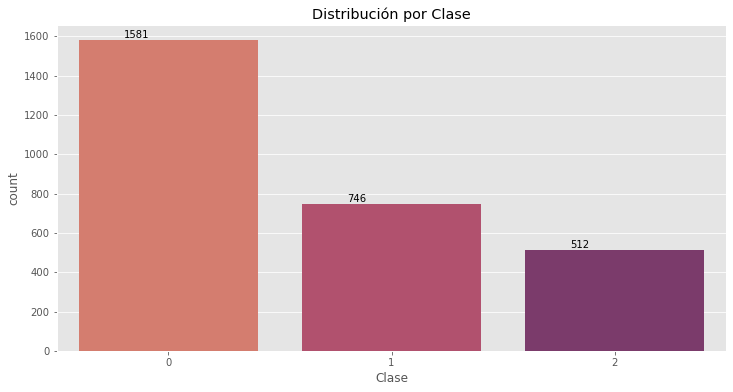

In [32]:
plt.style.use('ggplot')
Frecuencia = Org.groupby('Clase').sum()
plt.figure(figsize=(12,6))
graf = sns.countplot(Org['Clase'],palette='flare')
plt.title('Distribución por Clase')
for p in graf.patches:
    graf.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='bottom', color='black', size=10)
plt.show()

In [33]:
X = np.array(Org.drop(['Clase','IPCM'],1))
Y = np.array(Org['Clase'])
feature_names = Org.drop([ 'Clase','IPCM'],1)
feature_names = feature_names.columns
feature_names = np.array(feature_names)
feature_names

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


array(['O_88', 'O_89', 'O_12', 'O_13', 'O_22', 'O_67', 'O_68', 'O_8',
       'O_19_1', 'O_19_2', 'O_19_3', 'O_19_4', 'O_19_5', 'O_19_6',
       'O_19_7', 'O_19_8', 'O_19_9', 'O_20_1', 'O_20_2', 'O_20_3',
       'O_20_4', 'O_20_5', 'O_20_6', 'O_20_7', 'O_20_8', 'O_70', 'O_71',
       'O_72_1', 'O_72_2', 'O_72_3', 'O_72_4', 'O_72_5', 'O_72_6',
       'O_72_7', 'O_72_8', 'O_72_9', 'O_24', 'O_48', 'O_52', 'O_54',
       'O_58', 'O_59', 'O_90', 'O_28_1', 'O_28_2', 'O_28_3', 'O_28_4',
       'O_28_5', 'O_28_6', 'O_28_7', 'O_28_8', 'O_37_1', 'O_37_2',
       'O_37_3', 'O_37_4', 'O_37_5', 'O_38_1', 'O_38_2', 'O_38_3',
       'O_38_4', 'O_38_5', 'O_38_6', 'O_38_7', 'O_38_8', 'O_38_9',
       'O_66_1', 'O_66_2', 'O_66_3', 'O_66_4', 'O_66_5', 'O_66_6',
       'O_66_7', 'O_81_1', 'O_81_2', 'O_81_3', 'O_81_4', 'O_81_5',
       'O_81_6', 'O_81_7', 'O_82_1', 'O_82_2', 'O_82_3', 'O_82_4',
       'O_82_5', 'O_82_6', 'O_82_7', 'O_40', 'O_41', 'O_45', 'O_49',
       'O_55', 'O_61_1', 'O_61_2', 'O_61_3', 

In [34]:
X = pd.DataFrame(X, columns=feature_names)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1234)

In [36]:
rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 500, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

gs_rfc = GridSearchCV(rfc, param_grid, cv=skf, verbose=1,n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [37]:
print("Mejores parámetros", gs_rfc.best_params_)
print("Mejor estimador", gs_rfc.best_estimator_)

Mejores parámetros {'max_features': 'sqrt', 'n_estimators': 700}
Mejor estimador RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=700)


In [38]:
rfc = RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       n_estimators=700, n_jobs=-1)

rfc.fit(X_train,y_train)
rfc_y_pred = rfc.predict(X_test)
rfc_y_pred

array([0, 1, 0, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0,
       2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0,
       2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [39]:
matriz_rfc = confusion_matrix(y_test, rfc_y_pred)
print('Matriz de Confusión:')
print(matriz_rfc)

Matriz de Confusión:
[[465   4   4]
 [ 32 190   6]
 [  3   0 148]]


Text(0.5, 24.0, 'Predicción')

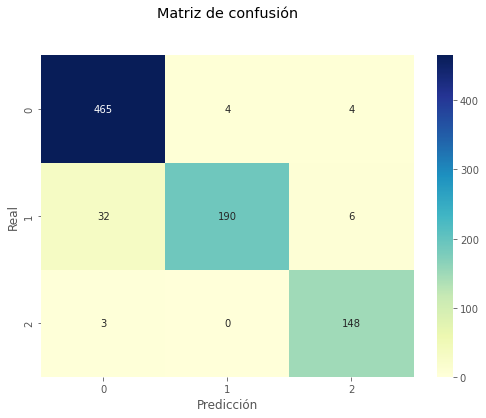

In [40]:
plt.rcParams["figure.figsize"] = (7,5)
sns.heatmap(pd.DataFrame(matriz_rfc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Matriz de confusión', y=1.1)
plt.ylabel('Real')
plt.xlabel('Predicción')

In [41]:
precision_rfc = precision_score(y_test, rfc_y_pred,average='micro')
print('Precisión del modelo:')
print(precision_rfc)

accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
print('Exactitud del modelo:')
print(accuracy_rfc)

recall_rfc = recall_score(y_test, rfc_y_pred, average='micro')
print('Exhaustividad del modelo:')
print(recall_rfc)

f1_rfc = f1_score(y_test, rfc_y_pred, average='micro')
print('Valor F1 del modelo:')
print(f1_rfc)

Precisión del modelo:
0.9424882629107981
Exactitud del modelo:
0.9424882629107981
Exhaustividad del modelo:
0.9424882629107981
Valor F1 del modelo:
0.9424882629107981


In [42]:
clas_rfc = classification_report(y_test, rfc_y_pred, zero_division = 1)
print(clas_rfc)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       473
           1       0.98      0.83      0.90       228
           2       0.94      0.98      0.96       151

    accuracy                           0.94       852
   macro avg       0.95      0.93      0.94       852
weighted avg       0.94      0.94      0.94       852



In [43]:
rfc.feature_importances_

array([0.00210316, 0.00128109, 0.00142295, 0.00129663, 0.00793624,
       0.00952651, 0.01126433, 0.00152989, 0.00845297, 0.01348568,
       0.01931609, 0.01966501, 0.0137865 , 0.01902322, 0.02066988,
       0.01043059, 0.01339177, 0.04015254, 0.02937613, 0.02259955,
       0.02870417, 0.03249873, 0.03655395, 0.04366819, 0.0260528 ,
       0.00853559, 0.00707691, 0.00174204, 0.00217877, 0.00129647,
       0.00176237, 0.00187577, 0.00271578, 0.00388971, 0.05321781,
       0.03660238, 0.00706052, 0.00156078, 0.0065704 , 0.00174834,
       0.00429685, 0.00357263, 0.00594335, 0.00320934, 0.00576726,
       0.00983797, 0.00709052, 0.00395419, 0.00759634, 0.00558238,
       0.00010684, 0.00110289, 0.00118781, 0.00082974, 0.0004717 ,
       0.00176585, 0.00190231, 0.00178333, 0.0015022 , 0.00183519,
       0.00192144, 0.00158889, 0.00198042, 0.00141505, 0.00112595,
       0.00936486, 0.00161401, 0.00184215, 0.00181717, 0.00146327,
       0.00110593, 0.00096017, 0.01074674, 0.00394293, 0.00294

Text(0.5, 0, 'Random Forest Feature Importance')

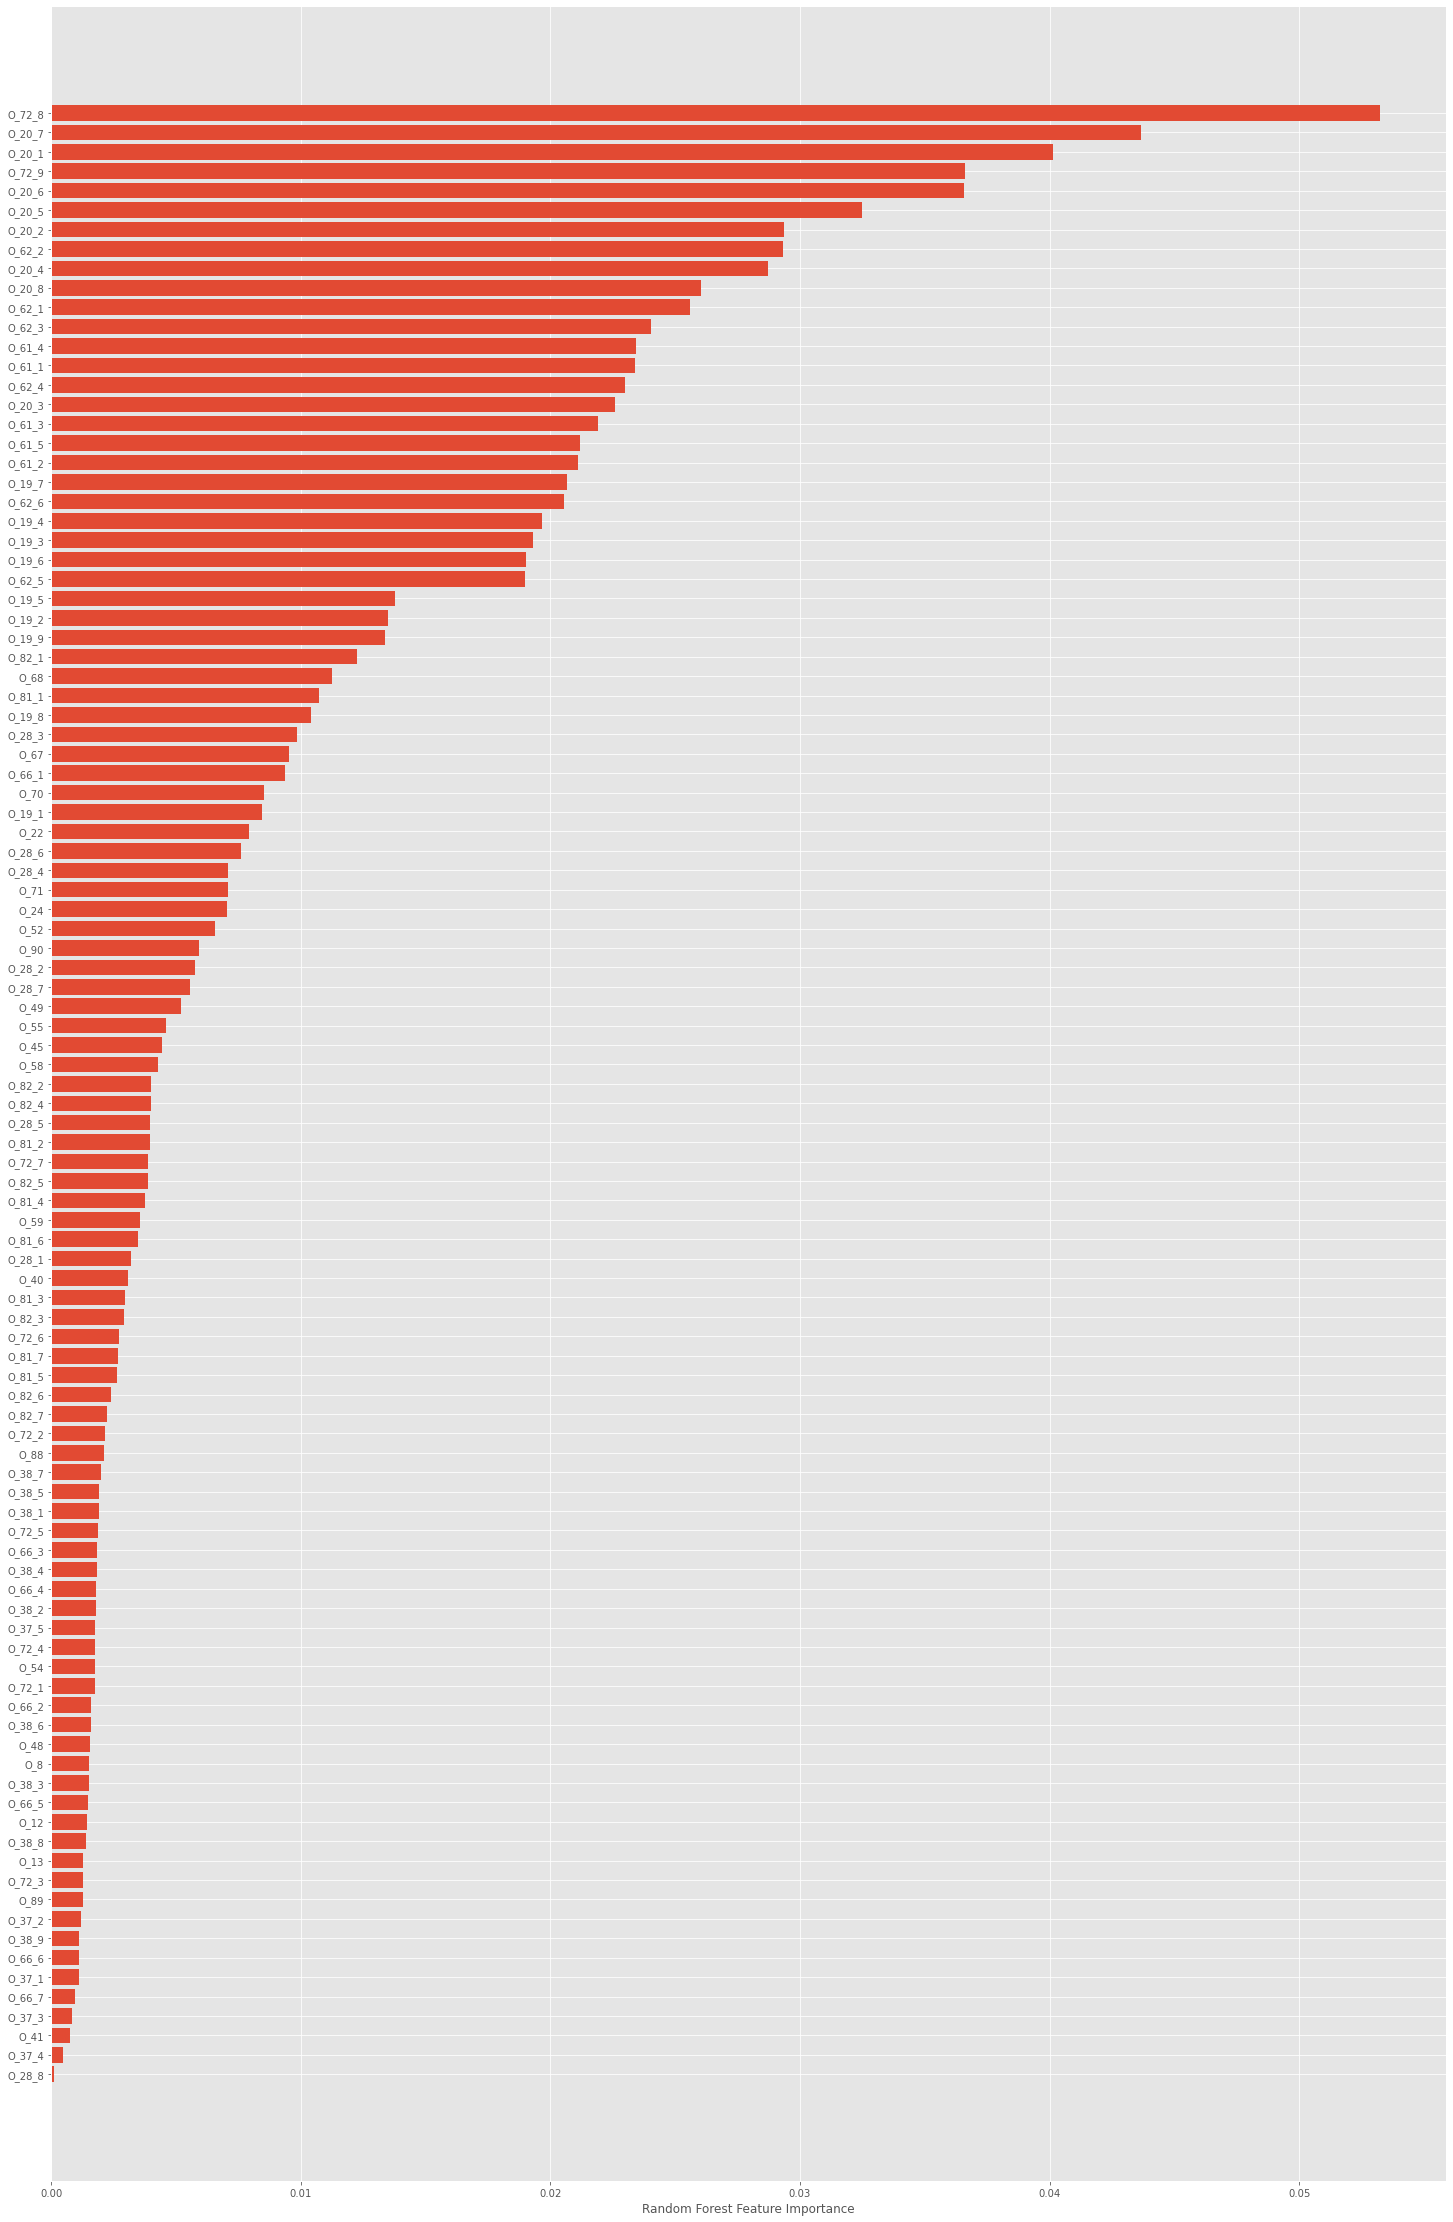

In [44]:
plt.rcParams["figure.figsize"] = (25, 40)
variables_importantes = rfc.feature_importances_.argsort()
plt.barh(feature_names[variables_importantes], rfc.feature_importances_[variables_importantes])
plt.xlabel("Random Forest Feature Importance")

In [45]:
perm_importance = permutation_importance(rfc, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

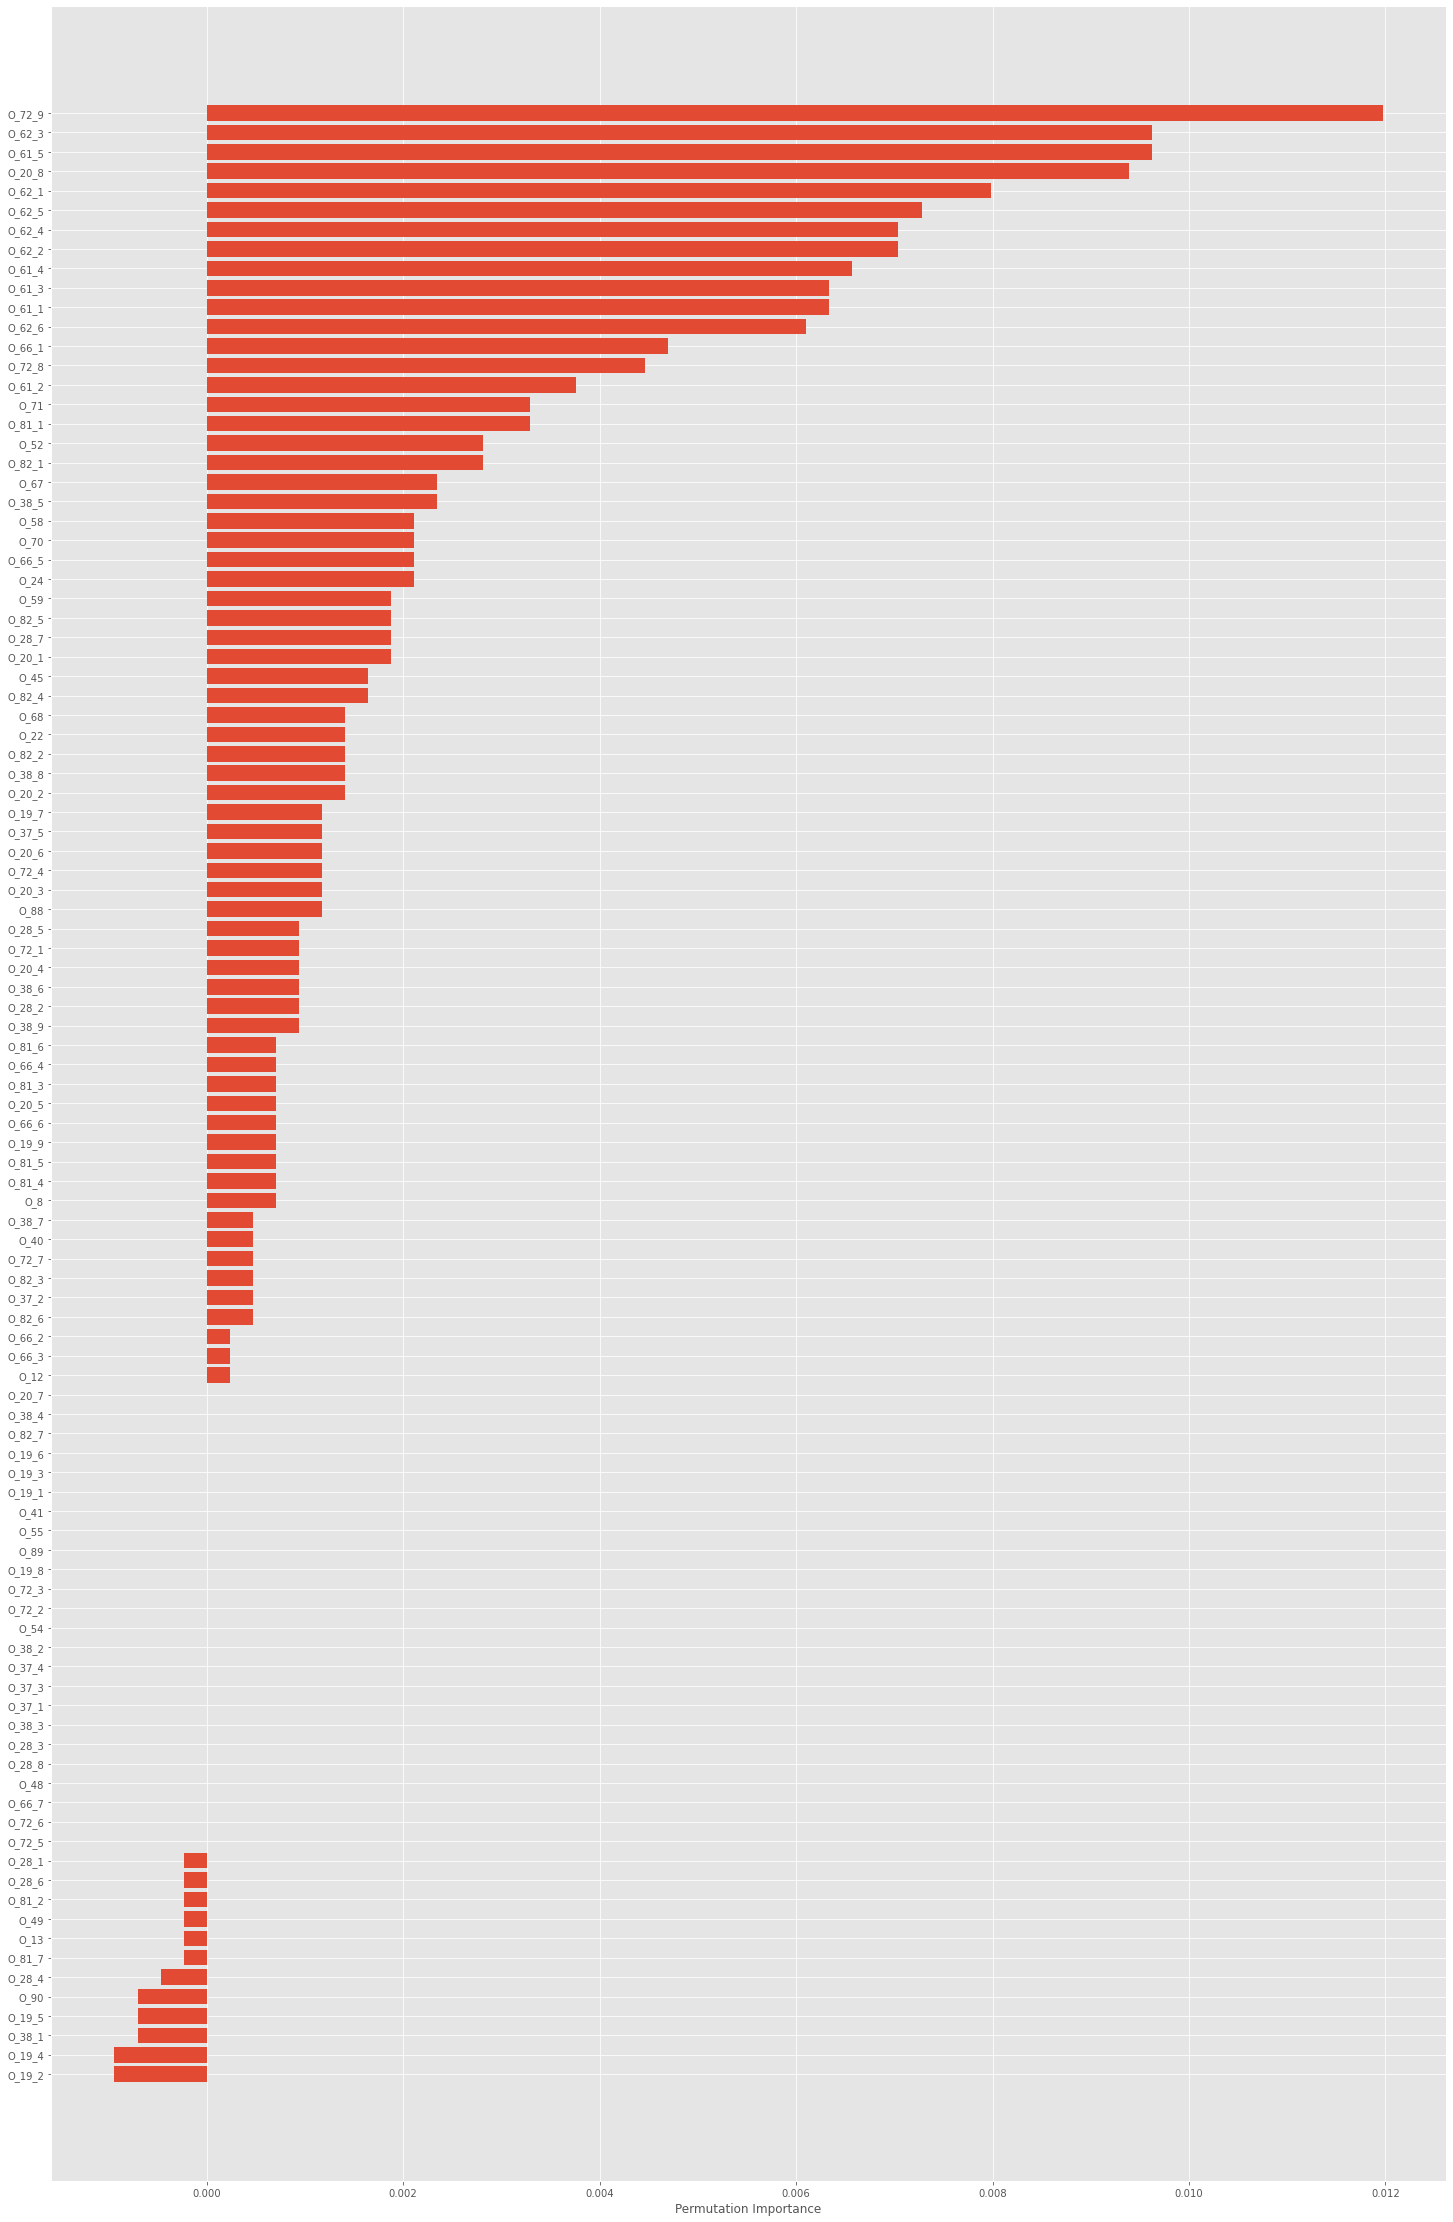

In [46]:
Variables_permutadas = perm_importance.importances_mean.argsort()
plt.barh(feature_names[Variables_permutadas], perm_importance.importances_mean[Variables_permutadas])
plt.xlabel("Permutation Importance")

In [47]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)

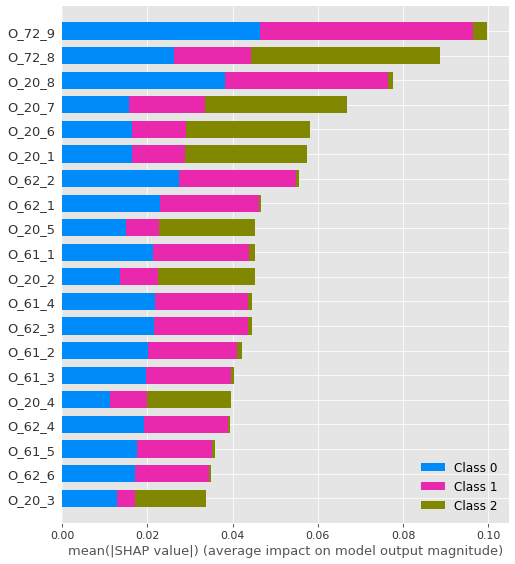

In [48]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

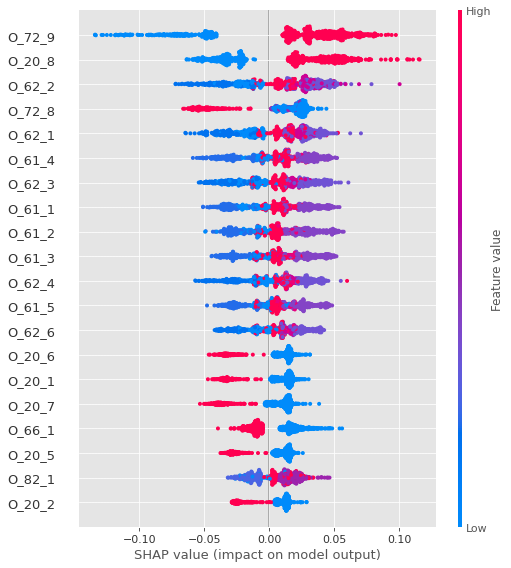

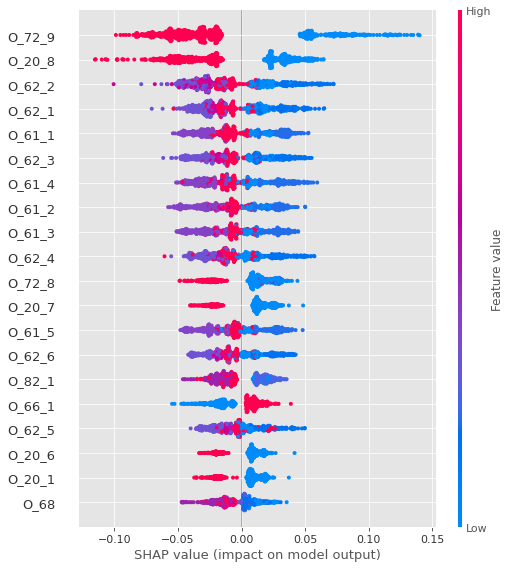

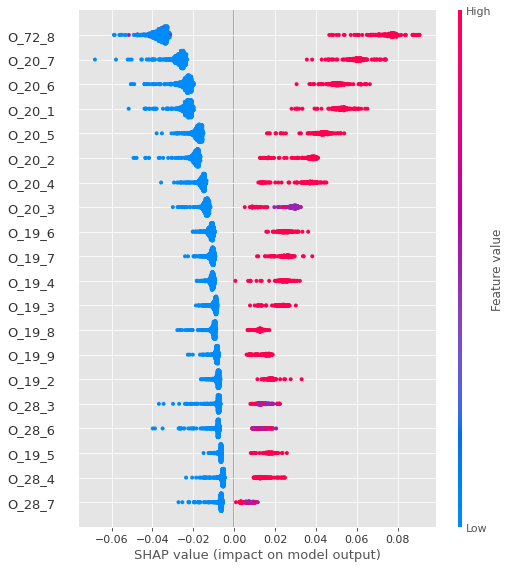

In [49]:
shap.summary_plot(shap_values[0], X_test)
shap.summary_plot(shap_values[1], X_test)
shap.summary_plot(shap_values[2], X_test)